<a href="https://colab.research.google.com/github/tamaravera14/SIMULACI-N-I/blob/main/Metodo_de_Box_Muller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Método de Box - Müller***
## **Box y Müller (1958)**
---
Tamara Alheli Bazaldua Vera

---

El siguiente enfoque puede usarse para generar un par de desviaciones aleatorias de la misma distribución normal a partir de un par de números aleatorios.

---

Sean $U_1, U_2$ variables aleatorias independientes con la misma función de densidad rectangular en el intervalo $(0,1)$. Consideremos las variables
aleatorias:

---

1. $X = \sqrt{-2\log{U_1}} cos(2π) U_2$
2. $Y = \sqrt{-2\log{U_1}} sen(2π) U_2$

Entonces, $(0, 1)$ un par de variables aleatorias independientes de la misma distribución normal con **media cero** y **varianza unitaria**.

---

Dadas $X, Y$, se obtienen sus relaciones inversas:

1. $U_1 = e^{-\frac{X^2+Y^2}{2}}$
2. $U_2 = \frac{1}{2π}$arctan$(\frac{Y}{X})$

Donde su función de densidad conjunta es:

$$f(X,Y) = \frac{1}{2π}e^{-\frac{X^2+Y^2}{2}} = \frac{1}{\sqrt{2π}}e^{-\frac{X^2}{2}} ⋅ \frac{1}{\sqrt{2π}}e^{-\frac{Y^2}{2}} = f (X)f(Y) $$

---

---

De lo anterior podemos concluir que:
* Las variables son inddependientes X e Y.
* La función de densidad de probabilidad $f(X,Y)$ es constante en los círculos.
  * Así, $Θ = $arctan$(\frac{Y}{X})$.
  * Esta uniformemente distribuido de $(0, 2\pi)$.
  * El cuadrado del vector radio $r^2 = X^2 + Y^2$ .
  * Distribución Chi-Cuadrada con dos grados de libertad.
* Si U tiene una densidad rectangular de (0,1)
  * Entonces, $-2log(U)$ tiene una distribución chi-cuadrada con dos grados de libertad.
---


---
Nota:
Las observaciones de una distribución chi-cuadrada con ***2k*** grados de libertad pueden, por supuesto, generarse sumando los *k* términos:

$\sum_{i=1}^{k}{-2\log(U_i)}$

El método propuesto aquí surgió del deseo de tener una forma de generar desviaciones normales que fuera confiable en las colas de la distribución.

 Los números pseudoaleatorios pueden generarse mediante una variedad de métodos dentro de la máquina, y el propósito de esta nota es presentar lo que se cree que es un nuevo método para generar desviaciones normales a partir de números aleatorios independientes. Este enfoque puede utilizarse tanto en computadoras pequeñas como en computadoras de gran escala.

 ---

### ***Pseudocódigo***

---

Generar:
* $U1, U2$ ~ $U(0,1)$

Hacer:
* $R = \sqrt{-2\log{U_1}}$

* $Θ = 2πU_2$

* $X = Rcos(π)$

* $Y = Rsen(π)$

Salir:

* $X, Y$

In [19]:
import random
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math

In [26]:
def Gen_DU(n):
  lista = []
  for _ in range(n):
    U1 = random.random()
    U2 = random.random()      # Generamos 2 números aleatorios
    R = math.sqrt(-2*math.log(U1))    # Hacemos √-2log(U_1)
    teta = 2*math.pi*U2               # Hacemos Θ = 2πU_2
    x = R * math.cos(teta)          # Hacemos X = √-2log(U_1) * cos(2πU_2)
    y = R * math.sin(teta)          # Hacemos Y = √-2log(U_1) * sin(2πU_2)
    lista.append(x)
    lista.append(y)
  return lista              # Regresamos la muestra

In [38]:
x = Gen_DU(50000) # Realizar el experimento n veces

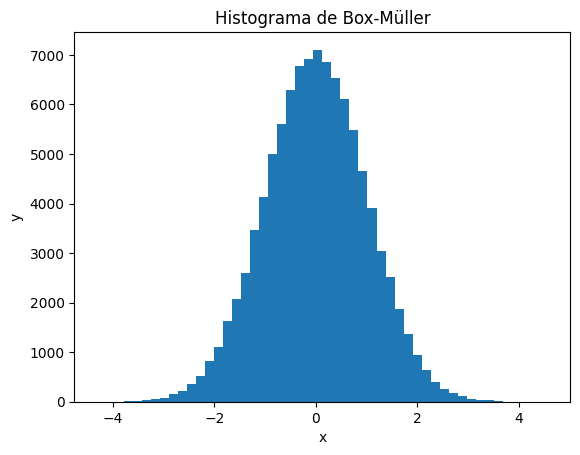

In [39]:
# Crear el histograma
plt.hist(x, bins=50)

# Añadir etiquetas y título
plt.xlabel('x')
plt.ylabel('y')
plt.title('Histograma de Box-Müller')

# Mostrar el histograma
plt.show()

In [40]:
print("Media estimada: ", np.mean(x))
print("Media real: 0")
print("Error de media: ", abs(np.mean(x) - 0))

Media estimada:  0.0007257945409500286
Media real: 0
Error de media:  0.0007257945409500286


In [41]:
print("Varianza estimada: ", np.var(x))
print("Varianza real: 1")
print("Error de Varianza: ", abs(np.var(x) - 1))


Varianza estimada:  0.9920564707646279
Varianza real: 1
Error de Varianza:  0.007943529235372115


In [42]:
print("Desviación estándar estimada: ", statistics.stdev(x))
print("Desviación estándar real: 1")
print("Error de Desviación estándar: ", abs(statistics.stdev(x) - 1))

Desviación estándar estimada:  0.9960252965806352
Desviación estándar real: 1
Error de Desviación estándar:  0.003974703419364789
